In [257]:
#importing libraries for project
#python's lxml library parses xml and html files
from lxml import html
#use requests to get data from web pages
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [258]:
#2019 data
#use requests.get() to get web page with 2019 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/E018AECE-A1B8-46E7-B1B7-46FE1BCEBFB6/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2019 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2019

['Nov 23, 2019\xa0\xa0',
 'Cookeville, Tenn.   \xa0\xa0',
 'Tennessee State 37, Tennessee Tech 27\xa0\xa0',
 '\xa0',
 'Nov 16, 2019\xa0\xa0',
 'Martin, Tenn.       \xa0\xa0',
 'UT Martin 28, Tennessee State 17\xa0\xa0',
 '\xa0',
 'Nov 09, 2019\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'EIU 49, Tennessee State 38\xa0\xa0',
 '\xa0',
 'Nov 02, 2019\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'SEMO 32, Tennessee State 13\xa0\xa0',
 '\xa0',
 'Oct 19, 2019\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 26, Austin Peay 24\xa0\xa0',
 '\xa0',
 'Oct 12, 2019\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Murray State 31, Tennessee State 17\xa0\xa0',
 '\xa0',
 'Oct 05, 2019\xa0\xa0',
 'Jacksonville, Ala.  \xa0\xa0',
 'Jacksonville State 31, Tennessee State 23\xa0\xa0',
 '\xa0',
 'Sep 28, 2019\xa0\xa0',
 'Richmond, Ky.       \xa0\xa0',
 'Eastern Kentucky 42, Tennessee State 16\xa0\xa0',
 '\xa0',
 'Sep 21, 2019\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'UAPB 37, Tennessee State 31\x

In [259]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2019=[s.replace("UAPB","Pine Bluff") for s in schedule2019]
schedule2019=[t.replace("SEMO","Southeast Missouri") for t in schedule2019]
schedule2019=[u.replace("EIU","Eastern Illinois") for u in schedule2019]
schedule2019=[v.replace("UT","Tennessee") for v in schedule2019]
schedule2019=[w.replace(".", "") for w in schedule2019]
schedule2019=[x.replace("\xa0", "") for x in schedule2019]
schedule2019=[y.replace(",","") for y in schedule2019]
schedule2019=[z.strip() for z in schedule2019]
schedule2019

['Nov 23 2019',
 'Cookeville Tenn',
 'Tennessee State 37 Tennessee Tech 27',
 '',
 'Nov 16 2019',
 'Martin Tenn',
 'Tennessee Martin 28 Tennessee State 17',
 '',
 'Nov 09 2019',
 'Nashville Tenn',
 'Eastern Illinois 49 Tennessee State 38',
 '',
 'Nov 02 2019',
 'Nashville Tenn',
 'Southeast Missouri 32 Tennessee State 13',
 '',
 'Oct 19 2019',
 'Nashville Tenn',
 'Tennessee State 26 Austin Peay 24',
 '',
 'Oct 12 2019',
 'Nashville Tenn',
 'Murray State 31 Tennessee State 17',
 '',
 'Oct 05 2019',
 'Jacksonville Ala',
 'Jacksonville State 31 Tennessee State 23',
 '',
 'Sep 28 2019',
 'Richmond Ky',
 'Eastern Kentucky 42 Tennessee State 16',
 '',
 'Sep 21 2019',
 'Nashville Tenn',
 'Pine Bluff 37 Tennessee State 31',
 '',
 'Sep 14 2019',
 'Memphis Tenn',
 'Jackson State 49 Tennessee State 44',
 '',
 'Sep 7 2019',
 'Murfreesboro TN',
 'Middle Tennessee 45 Tennessee State 26',
 '',
 'Aug 31 2019',
 'Nashville Tenn',
 'Tennessee State 26 Mississippi Valley 20',
 '']

In [260]:
#2018 data
#use requests.get() to get web page with 2018 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/125803E8-C113-4C2F-890C-645D4ED8B38B/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2018 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2018

['Nov 17, 2018\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 31, UTM 28\xa0\xa0',
 '\xa0',
 'Nov 10, 2018\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Jacksonville State 41, Tennessee State 14\xa0\xa0',
 '\xa0',
 '11-03-18    \xa0\xa0',
 'Cape Girardeau, Mo. \xa0\xa0',
 'Southeast Missouri 38, Tennessee State 21\xa0\xa0',
 '\xa0',
 'Oct 20, 2018\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee State 41, Tennessee Tech 14\xa0\xa0',
 '\xa0',
 'Oct 13, 2018\xa0\xa0',
 'Murray, Ky.         \xa0\xa0',
 'Murray St. 45, Tennessee State 21\xa0\xa0',
 '\xa0',
 'Oct 06, 2018\xa0\xa0',
 'Clarksville, Tenn.  \xa0\xa0',
 'Austin Peay 49, Tennessee State 34\xa0\xa0',
 '\xa0',
 'Sep 29, 2018\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Vanderbilt 31, Tennessee State 27\xa0\xa0',
 '\xa0',
 'Sep 22, 2018\xa0\xa0',
 'Charleston, Ill.    \xa0\xa0',
 'Tennessee State 41, Eastern Illinois 40\xa0\xa0',
 '\xa0',
 'Sep 01, 2018\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 

In [261]:
#get rid of extra text and spaces in list
#put text for date, school name and city into format that's compatible for data frame
schedule2018=[q.replace('Vanderbilt','Vanderbilt University') for q in schedule2018]
schedule2018=[p.replace('Cape Girardeau','CapeGirardeau') for p in schedule2018]
schedule2018=[r.replace('11-03-18','Nov 03 2018') for r in schedule2018]
schedule2018=[s.replace("UTM","Tennessee Martin") for s in schedule2018]
schedule2018=[t.replace("SEMO","Southeast Missouri") for t in schedule2018]
schedule2018=[u.replace("Bethune-Cookman","Bethune Cookman") for u in schedule2018]
schedule2018=[w.replace(".", "") for w in schedule2018]
schedule2018=[x.replace("\xa0", "") for x in schedule2018]
schedule2018=[y.replace(",","") for y in schedule2018]
schedule2018=[z.strip() for z in schedule2018]
schedule2018

['Nov 17 2018',
 'Nashville Tenn',
 'Tennessee State 31 Tennessee Martin 28',
 '',
 'Nov 10 2018',
 'Nashville Tenn',
 'Jacksonville State 41 Tennessee State 14',
 '',
 'Nov 03 2018',
 'CapeGirardeau Mo',
 'Southeast Missouri 38 Tennessee State 21',
 '',
 'Oct 20 2018',
 'Nashville TN',
 'Tennessee State 41 Tennessee Tech 14',
 '',
 'Oct 13 2018',
 'Murray Ky',
 'Murray St 45 Tennessee State 21',
 '',
 'Oct 06 2018',
 'Clarksville Tenn',
 'Austin Peay 49 Tennessee State 34',
 '',
 'Sep 29 2018',
 'Nashville Tenn',
 'Vanderbilt University 31 Tennessee State 27',
 '',
 'Sep 22 2018',
 'Charleston Ill',
 'Tennessee State 41 Eastern Illinois 40',
 '',
 'Sep 01 2018',
 'Nashville Tenn',
 'Tennessee State 34 Bethune Cookman 3',
 '']

In [262]:
#2017 data
#use requests.get() to get web page with 2017 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/1EEBECA9-B01E-43AB-B6EB-AFDBF863957B/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2017 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2017

['Nov 16, 2017\xa0\xa0',
 'Jacksonville, Ala.  \xa0\xa0',
 'Jacksonville State 36, Tennessee State 6\xa0\xa0',
 '\xa0',
 'Nov 11, 2017\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 23, SEMO 20\xa0\xa0',
 '\xa0',
 'Nov 04, 2017\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 60, VUL 0\xa0\xa0',
 '\xa0',
 'Oct 28, 2017\xa0\xa0',
 'Cookeville, Tenn.   \xa0\xa0',
 'Tennessee Tech 30, Tennessee State 26\xa0\xa0',
 '\xa0',
 'Oct 14, 2017\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Austin Peay 21, Tennessee State 17\xa0\xa0',
 '\xa0',
 'Oct 07, 2017\xa0\xa0',
 'Richmond, Ky.       \xa0\xa0',
 'Tennessee State 45, Eastern Kentucky 21\xa0\xa0',
 '\xa0',
 'Sep 30, 2017\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Eastern Illinois 19, Tennessee State 16\xa0\xa0',
 '\xa0',
 'Sep 23, 2017\xa0\xa0',
 'Martin, Tenn.       \xa0\xa0',
 'UT Martin 31, Tennessee State 16\xa0\xa0',
 '\xa0',
 'Sep 17, 2017\xa0\xa0',
 'Tampa, Fla          \xa0\xa0',
 'Tennessee State 24, Florida

In [263]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2017=[t.replace("VUL", "VirginiaU Lynchburg") for t in schedule2017]
schedule2017=[u.replace("SEMO","Southeast Missouri") for u in schedule2017]
schedule2017=[v.replace("UT","Tennessee")for v in schedule2017]
schedule2017=[w.replace(".", "") for w in schedule2017]
schedule2017=[x.replace("\xa0", "") for x in schedule2017]
schedule2017=[y.replace(",","") for y in schedule2017]
schedule2017=[z.strip() for z in schedule2017]
schedule2017

['Nov 16 2017',
 'Jacksonville Ala',
 'Jacksonville State 36 Tennessee State 6',
 '',
 'Nov 11 2017',
 'Nashville Tenn',
 'Tennessee State 23 Southeast Missouri 20',
 '',
 'Nov 04 2017',
 'Nashville Tenn',
 'Tennessee State 60 VirginiaU Lynchburg 0',
 '',
 'Oct 28 2017',
 'Cookeville Tenn',
 'Tennessee Tech 30 Tennessee State 26',
 '',
 'Oct 14 2017',
 'Nashville Tenn',
 'Austin Peay 21 Tennessee State 17',
 '',
 'Oct 07 2017',
 'Richmond Ky',
 'Tennessee State 45 Eastern Kentucky 21',
 '',
 'Sep 30 2017',
 'Nashville Tenn',
 'Eastern Illinois 19 Tennessee State 16',
 '',
 'Sep 23 2017',
 'Martin Tenn',
 'Tennessee Martin 31 Tennessee State 16',
 '',
 'Sep 17 2017',
 'Tampa Fla',
 'Tennessee State 24 Florida A&M 13',
 '',
 'Sep 09 2017',
 'Memphis Tenn',
 'Tennessee State 17 Jackson State 15',
 '',
 'Aug 31 2017',
 'Atlanta Ga',
 'Tennessee State 17 Georgia State 10',
 '']

In [264]:
#2016 data
#use requests.get() to get web page with 2016 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/F8A9B17C-4555-45FB-AAF3-D88956A7F089/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2016 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2016

['11-19-16    \xa0\xa0',
 'Cape Girardeau, Mo. \xa0\xa0',
 'Tennessee State 32, Southeast Missouri 31\xa0\xa0',
 '\xa0',
 'Nov 12, 2016\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee Tech 44, Tennessee State 16\xa0\xa0',
 '\xa0',
 'Nov 05, 2016\xa0\xa0',
 'Clarksville, Tenn.  \xa0\xa0',
 'Tennessee State 41, Austin Peay 40\xa0\xa0',
 '\xa0',
 'Oct 29, 2016\xa0\xa0',
 'Murray, Ky.         \xa0\xa0',
 'Murray St. 38, Tennessee State 31\xa0\xa0',
 '\xa0',
 'Oct 22, 2016\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Vanderbilt 35, Tennessee State 17\xa0\xa0',
 '\xa0',
 'Oct 15, 2016\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 35, Eastern Kentucky 28\xa0\xa0',
 '\xa0',
 'Oct 08, 2016\xa0\xa0',
 'Charleston, Ill.    \xa0\xa0',
 'Eastern Illinois 35, Tennessee State 34\xa0\xa0',
 '\xa0',
 'Oct 01, 2016\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 34, UT Martin 30\xa0\xa0',
 '\xa0',
 'Sep 17, 2016\xa0\xa0',
 'Daytona Beach, Fla. \xa0\xa0',
 'Tennessee St

In [265]:
#get rid of extra text and spaces in list
#put text for date,school name and city into format that's compatible for data frame
schedule2016=[o.replace('Pine Bluff',"PineBluff") for o in schedule2016]
schedule2016=[p.replace('11-19-16','Nov 19 2016') for p in schedule2016]
schedule2016=[r.replace('Cape Girardeau','CapeGirardeau') for r in schedule2016]
schedule2016=[s.replace("Vanderbilt","Vanderbilt University") for s in schedule2016]
schedule2016=[t.replace("UT","Tennessee") for t in schedule2016]
schedule2016=[u.replace("Daytona Beach", "DaytonaBeach") for u in schedule2016]
schedule2016=[v.replace("-"," ") for v in schedule2016]
schedule2016=[w.replace(".", "") for w in schedule2016]
schedule2016=[x.replace("\xa0", "") for x in schedule2016]
schedule2016=[y.replace(",","") for y in schedule2016]
schedule2016=[z.strip() for z in schedule2016]
schedule2016

['Nov 19 2016',
 'CapeGirardeau Mo',
 'Tennessee State 32 Southeast Missouri 31',
 '',
 'Nov 12 2016',
 'Nashville TN',
 'Tennessee Tech 44 Tennessee State 16',
 '',
 'Nov 05 2016',
 'Clarksville Tenn',
 'Tennessee State 41 Austin Peay 40',
 '',
 'Oct 29 2016',
 'Murray Ky',
 'Murray St 38 Tennessee State 31',
 '',
 'Oct 22 2016',
 'Nashville Tenn',
 'Vanderbilt University 35 Tennessee State 17',
 '',
 'Oct 15 2016',
 'Nashville Tenn',
 'Tennessee State 35 Eastern Kentucky 28',
 '',
 'Oct 08 2016',
 'Charleston Ill',
 'Eastern Illinois 35 Tennessee State 34',
 '',
 'Oct 01 2016',
 'Nashville Tenn',
 'Tennessee State 34 Tennessee Martin 30',
 '',
 'Sep 17 2016',
 'DaytonaBeach Fla',
 'Tennessee State 31 Bethune Cookman 24',
 '',
 'Sep 10 2016',
 'Memphis Tenn',
 'Tennessee State 40 Jackson State 26',
 '',
 'Sep 03 2016',
 'Nashville Tenn',
 'Tennessee State 44 Arkansas PineBluff 0',
 '']

In [266]:
#2015 data
#use requests.get() to get web page with 2015 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/B8713968-6888-4BB4-B12E-9BA4C76282AC/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2015 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2015

['Nov 21, 2015\xa0\xa0',
 'Cookeville, Tenn.   \xa0\xa0',
 'Tennessee Tech 30, Tennessee State 24\xa0\xa0',
 '\xa0',
 'Nov 07, 2015\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Murray State 46, Tennessee State 43\xa0\xa0',
 '\xa0',
 'Oct 31, 2015\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 20, Austin Peay 6\xa0\xa0',
 '\xa0',
 'Oct 24, 2015\xa0\xa0',
 'Richmond, Ky.       \xa0\xa0',
 'Eastern Kentucky 45, Tennessee State 21\xa0\xa0',
 '\xa0',
 'Oct 17, 2015\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Eastern Illinois 25, Tennessee State 22\xa0\xa0',
 '\xa0',
 'Oct 10, 2015\xa0\xa0',
 'Martin, Tenn.       \xa0\xa0',
 'UT Martin 28, Tennessee State 14\xa0\xa0',
 '\xa0',
 'Sep 26, 2015\xa0\xa0',
 'Tallahassee, Fla.   \xa0\xa0',
 'Tennessee State 30, FAMU 14\xa0\xa0',
 '\xa0',
 'Sep 19, 2015\xa0\xa0',
 'Jacksonville, Ala.  \xa0\xa0',
 'Jacksonville State 48, Tennessee State 13\xa0\xa0',
 '\xa0',
 'Sep 12, 2015\xa0\xa0',
 'Memphis, TN         \xa0\xa0',
 'Tennessee State 3

In [267]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2015=[s.replace("Tigers","") for s in schedule2015]
schedule2015=[t.replace("UT","Tennessee") for t in schedule2015]
schedule2015=[u.replace("FAMU","Florida A&M") for u in schedule2015]
schedule2015=[v.replace("-"," ") for v in schedule2015]
schedule2015=[w.replace(".", "") for w in schedule2015]
schedule2015=[x.replace("\xa0", "") for x in schedule2015]
schedule2015=[y.replace(",","") for y in schedule2015]
schedule2015=[z.strip() for z in schedule2015]
schedule2015

['Nov 21 2015',
 'Cookeville Tenn',
 'Tennessee Tech 30 Tennessee State 24',
 '',
 'Nov 07 2015',
 'Nashville Tenn',
 'Murray State 46 Tennessee State 43',
 '',
 'Oct 31 2015',
 'Nashville Tenn',
 'Tennessee State 20 Austin Peay 6',
 '',
 'Oct 24 2015',
 'Richmond Ky',
 'Eastern Kentucky 45 Tennessee State 21',
 '',
 'Oct 17 2015',
 'Nashville Tenn',
 'Eastern Illinois 25 Tennessee State 22',
 '',
 'Oct 10 2015',
 'Martin Tenn',
 'Tennessee Martin 28 Tennessee State 14',
 '',
 'Sep 26 2015',
 'Tallahassee Fla',
 'Tennessee State 30 Florida A&M 14',
 '',
 'Sep 19 2015',
 'Jacksonville Ala',
 'Jacksonville State 48 Tennessee State 13',
 '',
 'Sep 12 2015',
 'Memphis TN',
 'Tennessee State 35 Jackson State  25',
 '',
 'Sep 06 2015',
 'Nashville Tenn',
 'Tennessee State 24 Alabama State 14',
 '']

In [268]:
#2014 data
#use requests.get() to get web page with 2014 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/26C45AE2-D036-475D-A4EF-38BE29FA4865/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2014 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2014

['Nov 22, 2014\xa0\xa0',
 'Murray, Ky.         \xa0\xa0',
 'Tennessee State 48, Murray St. 33\xa0\xa0',
 '\xa0',
 'Nov 08, 2014\xa0\xa0',
 'Clarksville, Tenn.  \xa0\xa0',
 'Tennessee State 31, Austin Peay 27\xa0\xa0',
 '\xa0',
 'Nov 01, 2014\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Eastern Kentucky 56, Tennessee State 42\xa0\xa0',
 '\xa0',
 'Oct 25, 2014\xa0\xa0',
 'Charleston, Ill.    \xa0\xa0',
 'Eastern Illinois 28, Tennessee State 3\xa0\xa0',
 '\xa0',
 'Oct 18, 2014\xa0\xa0',
 'Hale Stadium        \xa0\xa0',
 'UT Martin 21, Tennessee State 16\xa0\xa0',
 '\xa0',
 'Oct 11, 2014\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Jacksonville State 27, Tennessee State 20\xa0\xa0',
 '\xa0',
 '10-04-14    \xa0\xa0',
 'Cape Girardeau, Mo. \xa0\xa0',
 'Southeast Missouri 28, Tennessee State 21\xa0\xa0',
 '\xa0',
 'Sep 27, 2014\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 27, Florida A&M 7\xa0\xa0',
 '\xa0',
 'Sep 20, 2014\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee

In [269]:
#get rid of extra text and spaces in list
#put text for date, school name and city into format that's compatible for data frame
schedule2014=[s.replace("Hale Stadium","Nashville, Tenn.") for s in schedule2014]
schedule2014=[t.replace("10-04-14","Oct 04, 2014") for t in schedule2014]
schedule2014=[u.replace("Cape Girardeau","CapeGirardeau") for u in schedule2014]
schedule2014=[v.replace("-"," ") for v in schedule2014]
schedule2014=[w.replace(".", "") for w in schedule2014]
schedule2014=[x.replace("\xa0", "") for x in schedule2014]
schedule2014=[y.replace(",","") for y in schedule2014]
schedule2014=[z.strip() for z in schedule2014]
schedule2014

['Nov 22 2014',
 'Murray Ky',
 'Tennessee State 48 Murray St 33',
 '',
 'Nov 08 2014',
 'Clarksville Tenn',
 'Tennessee State 31 Austin Peay 27',
 '',
 'Nov 01 2014',
 'Nashville Tenn',
 'Eastern Kentucky 56 Tennessee State 42',
 '',
 'Oct 25 2014',
 'Charleston Ill',
 'Eastern Illinois 28 Tennessee State 3',
 '',
 'Oct 18 2014',
 'Nashville Tenn',
 'UT Martin 21 Tennessee State 16',
 '',
 'Oct 11 2014',
 'Nashville Tenn',
 'Jacksonville State 27 Tennessee State 20',
 '',
 'Oct 04 2014',
 'CapeGirardeau Mo',
 'Southeast Missouri 28 Tennessee State 21',
 '',
 'Sep 27 2014',
 'Nashville Tenn',
 'Tennessee State 27 Florida A&M 7',
 '',
 'Sep 20 2014',
 'Nashville TN',
 'Tennessee State 10 Tennessee Tech 7',
 '',
 'Sep 13 2014',
 'Memphis Tenn',
 'Tennessee State 35 Jackson State 7',
 '',
 'Sep 06 2014',
 'Montgomery Ala',
 'Alabama State 27 Tennessee State 21',
 '',
 'Aug 30 2014',
 'Nashville Tenn',
 'Tennessee State 58 Edward Waters 6',
 '']

In [270]:
#2013 data
#use requests.get() to get web page with 2013 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/E394BBB1-387B-4C6A-9B21-E33D34956811/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2013 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2013

['Dec 07, 2013\xa0\xa0',
 'Charleston, Ill.    \xa0\xa0',
 'Eastern Illinois 51, Tennessee State 10\xa0\xa0',
 '\xa0',
 'Nov 30, 2013\xa0\xa0',
 'Indianapolis, Ind.  \xa0\xa0',
 'Tennessee State 31, Butler 0\xa0\xa0',
 '\xa0',
 'Nov 09, 2013\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 31, Austin Peay 6\xa0\xa0',
 '\xa0',
 'Nov 16, 2013\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 17, Murray State 10\xa0\xa0',
 '\xa0',
 'Nov 02, 2013\xa0\xa0',
 'Richmond, Ky.       \xa0\xa0',
 'Eastern Kentucky 44, Tennessee State 0\xa0\xa0',
 '\xa0',
 'Oct 26, 2013\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Eastern Illinois 34, Tennessee State 16\xa0\xa0',
 '\xa0',
 'Oct 19, 2013\xa0\xa0',
 'Martin, Tenn.       \xa0\xa0',
 'Tennessee State 29, UT Martin 15\xa0\xa0',
 '\xa0',
 'Oct 12, 2013\xa0\xa0',
 'Jacksonville, Ala.  \xa0\xa0',
 'Tennessee State 31, Jacksonville State 15\xa0\xa0',
 '\xa0',
 'Oct 05, 2013\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State

In [271]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2013=[r.replace("St. Louis","StLouis") for r in schedule2013]
schedule2013=[s.replace("Butler","Butler University") for s in schedule2013]
schedule2013=[t.replace("UT","Tennessee") for t in schedule2013]
schedule2013=[u.replace("Tigers","") for u in schedule2013]
schedule2013=[v.replace("-"," ") for v in schedule2013]
schedule2013=[w.replace(".", "") for w in schedule2013]
schedule2013=[x.replace("\xa0", "") for x in schedule2013]
schedule2013=[y.replace(",","") for y in schedule2013]
schedule2013=[z.strip() for z in schedule2013]
schedule2013

['Dec 07 2013',
 'Charleston Ill',
 'Eastern Illinois 51 Tennessee State 10',
 '',
 'Nov 30 2013',
 'Indianapolis Ind',
 'Tennessee State 31 Butler University 0',
 '',
 'Nov 09 2013',
 'Nashville Tenn',
 'Tennessee State 31 Austin Peay 6',
 '',
 'Nov 16 2013',
 'Nashville Tenn',
 'Tennessee State 17 Murray State 10',
 '',
 'Nov 02 2013',
 'Richmond Ky',
 'Eastern Kentucky 44 Tennessee State 0',
 '',
 'Oct 26 2013',
 'Nashville Tenn',
 'Eastern Illinois 34 Tennessee State 16',
 '',
 'Oct 19 2013',
 'Martin Tenn',
 'Tennessee State 29 Tennessee Martin 15',
 '',
 'Oct 12 2013',
 'Jacksonville Ala',
 'Tennessee State 31 Jacksonville State 15',
 '',
 'Oct 05 2013',
 'Nashville Tenn',
 'Tennessee State 40 Southeast Missouri 16',
 '',
 'Sep 28 2013',
 'StLouis Missouri',
 'Tennessee State 73 Central State 6',
 '',
 'Sep 21 2013',
 'Cookeville Tenn',
 'Tennessee State 41 Tennessee Tech 21',
 '',
 'Sep 14 2013',
 'Memphis Tenn',
 'Tennessee State 26 Jackson State  16',
 '',
 'Sep 07 2013',
 'Ta

In [272]:
#2012 data
#use requests.get() to get web page with 2012 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/BDF8C4F3-D7B6-4D50-847F-9227A0B71B68/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2012 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2012

['Nov 17, 2012\xa0\xa0',
 'Martin, Tenn.       \xa0\xa0',
 'UT Martin 35, Tennessee State 26\xa0\xa0',
 '\xa0',
 'Nov 03, 2012\xa0\xa0',
 'Murray, Ky.         \xa0\xa0',
 'Murray State 49, Tennessee State 28\xa0\xa0',
 '\xa0',
 'Oct 27, 2012\xa0\xa0',
 'Nashville, Tennessee\xa0\xa0',
 'Tennessee State 22, Tennessee Tech 21\xa0\xa0',
 '\xa0',
 'Oct 20, 2012\xa0\xa0',
 'Jacksonville, Ala.  \xa0\xa0',
 'Jacksonville State 31, Tennessee State 28\xa0\xa0',
 '\xa0',
 'Oct 13, 2012\xa0\xa0',
 'Cape Girardeau, Mo. \xa0\xa0',
 'Tennessee State 40, Southeast Missouri 28\xa0\xa0',
 '\xa0',
 'Oct 05, 2012\xa0\xa0',
 'Nashville, Tennessee\xa0\xa0',
 'Tennessee State 23, Eastern Kentucky 20\xa0\xa0',
 '\xa0',
 'Sep 29, 2012\xa0\xa0',
 'Nashville, Tennessee\xa0\xa0',
 'Tennessee State 40, Arkansas Pine Bluff 13\xa0\xa0',
 '\xa0',
 'Sep 22, 2012\xa0\xa0',
 'Daytona Beach, Fla. \xa0\xa0',
 'Tennessee State 21, Bethune-Cookman 14\xa0\xa0',
 '\xa0',
 'Sep 15, 2012\xa0\xa0',
 'Nashville, Tennessee\xa0\xa0

In [273]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2012=[r.replace("Cape Girardeau","CapeGirardeau") for r in schedule2012]
schedule2012=[s.replace("Daytona Beach","DaytonaBeach") for s in schedule2012]
schedule2012=[t.replace("UT","Tennessee") for t in schedule2012]
schedule2012=[u.replace("Pine Bluff","PineBluff") for u in schedule2012]
schedule2012=[v.replace("-"," ") for v in schedule2012]
schedule2012=[w.replace(".", "") for w in schedule2012]
schedule2012=[x.replace("\xa0", "") for x in schedule2012]
schedule2012=[y.replace(",","") for y in schedule2012]
schedule2012=[z.strip() for z in schedule2012]
schedule2012

['Nov 17 2012',
 'Martin Tenn',
 'Tennessee Martin 35 Tennessee State 26',
 '',
 'Nov 03 2012',
 'Murray Ky',
 'Murray State 49 Tennessee State 28',
 '',
 'Oct 27 2012',
 'Nashville Tennessee',
 'Tennessee State 22 Tennessee Tech 21',
 '',
 'Oct 20 2012',
 'Jacksonville Ala',
 'Jacksonville State 31 Tennessee State 28',
 '',
 'Oct 13 2012',
 'CapeGirardeau Mo',
 'Tennessee State 40 Southeast Missouri 28',
 '',
 'Oct 05 2012',
 'Nashville Tennessee',
 'Tennessee State 23 Eastern Kentucky 20',
 '',
 'Sep 29 2012',
 'Nashville Tennessee',
 'Tennessee State 40 Arkansas PineBluff 13',
 '',
 'Sep 22 2012',
 'DaytonaBeach Fla',
 'Tennessee State 21 Bethune Cookman 14',
 '',
 'Sep 15 2012',
 'Nashville Tennessee',
 'Tennessee State 34 Austin Peay 14',
 '',
 'Sep 08 2012',
 'Memphis Tennessee',
 'Tennessee State 38 Jackson State 12',
 '',
 'Sep 01 2012',
 'Nashville Tennessee',
 'Tennessee State 17 Florida A&M 14',
 '']

In [274]:
#2011 data
#use requests.get() to get web page with 2011 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/CA835442-6528-4937-854B-D964C9CC70B5/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2011 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2011

['Nov 19, 2011\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Jacksonville State 38, Tennessee State 16\xa0\xa0',
 '\xa0',
 'Nov 12, 2011\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 35, UT Martin 30\xa0\xa0',
 '\xa0',
 'Nov 05, 2011\xa0\xa0',
 'Charleston, Ill.    \xa0\xa0',
 'Tennessee State 18, Eastern Illinois 17\xa0\xa0',
 '\xa0',
 'Oct 22, 2011\xa0\xa0',
 'Richmond, Ky.       \xa0\xa0',
 'Eastern Kentucky 33, Tennessee State 22\xa0\xa0',
 '\xa0',
 'Oct 15, 2011\xa0\xa0',
 'Cookeville, Tenn.   \xa0\xa0',
 'Tennessee State 42, Tennessee Tech 40\xa0\xa0',
 '\xa0',
 'Oct 08, 2011\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 55, Southeast Missouri 3\xa0\xa0',
 '\xa0',
 'Oct 01, 2011\xa0\xa0',
 'Clarksville, Tenn.  \xa0\xa0',
 'Austin Peay 37, Tennessee State 34\xa0\xa0',
 '\xa0',
 'Sep 24, 2011\xa0\xa0',
 'USAFA, Colo.        \xa0\xa0',
 'Air Force 63, Tennessee State 24\xa0\xa0',
 '\xa0',
 'Sep 17, 2011\xa0\xa0',
 'Murray, Ky.         \xa0\xa0',
 'Murray

In [275]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2011=[r.replace("USAFA","AirForceAcademy") for r in schedule2011]
schedule2011=[s.replace("UT","Tennessee") for s in schedule2011]
schedule2011=[t.replace("Southern U.","Southern University") for t in schedule2011]
schedule2011=[v.replace("-"," ") for v in schedule2011]
schedule2011=[w.replace(".", "") for w in schedule2011]
schedule2011=[x.replace("\xa0", "") for x in schedule2011]
schedule2011=[y.replace(",","") for y in schedule2011]
schedule2011=[z.strip() for z in schedule2011]
schedule2011

['Nov 19 2011',
 'Nashville TN',
 'Jacksonville State 38 Tennessee State 16',
 '',
 'Nov 12 2011',
 'Nashville Tenn',
 'Tennessee State 35 Tennessee Martin 30',
 '',
 'Nov 05 2011',
 'Charleston Ill',
 'Tennessee State 18 Eastern Illinois 17',
 '',
 'Oct 22 2011',
 'Richmond Ky',
 'Eastern Kentucky 33 Tennessee State 22',
 '',
 'Oct 15 2011',
 'Cookeville Tenn',
 'Tennessee State 42 Tennessee Tech 40',
 '',
 'Oct 08 2011',
 'Nashville Tenn',
 'Tennessee State 55 Southeast Missouri 3',
 '',
 'Oct 01 2011',
 'Clarksville Tenn',
 'Austin Peay 37 Tennessee State 34',
 '',
 'Sep 24 2011',
 'AirForceAcademy Colo',
 'Air Force 63 Tennessee State 24',
 '',
 'Sep 17 2011',
 'Murray Ky',
 'Murray State 58 Tennessee State 27',
 '',
 'Sep 10 2011',
 'Memphis TN',
 'Jackson State 35 Tennessee State 29',
 '',
 'Sep 03 2011',
 'Nashville TN',
 'Tennessee State 33 Southern University 7',
 '']

In [276]:
#2010 data
#use requests.get() to get web page with 2010 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/108733F9-E3AE-4C3D-95EE-76C09DDBE24B/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2010 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2010

['Nov 20, 2010\xa0\xa0',
 'Murray, Ky.         \xa0\xa0',
 'Murray State 28, Tennessee State 23\xa0\xa0',
 '\xa0',
 'Nov 13, 2010\xa0\xa0',
 'Martin, Tenn.       \xa0\xa0',
 'UT Martin 37, Tennessee State 0\xa0\xa0',
 '\xa0',
 'Nov 06, 2010\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Eastern Illinois 31, Tennessee State 28\xa0\xa0',
 '\xa0',
 'Oct 23, 2010\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee Tech 21, Tennessee State 10\xa0\xa0',
 '\xa0',
 'Oct 16, 2010\xa0\xa0',
 'Jacksonville, Ala.  \xa0\xa0',
 'Jacksonville State 24, Tennessee State 0\xa0\xa0',
 '\xa0',
 'Oct. 9, 2010\xa0\xa0',
 'Cape Girardeau, Mo. \xa0\xa0',
 'Southeast Missouri 19, Tennessee State 17\xa0\xa0',
 '\xa0',
 'Oct. 2, 2010\xa0\xa0',
 'Indianapolis, Ind.  \xa0\xa0',
 'Tennessee State 37, North Carolina A&T 7\xa0\xa0',
 '\xa0',
 'Sep 25, 2010\xa0\xa0',
 'Atlanta, GA         \xa0\xa0',
 'Tennessee State 29, Florida A&M 18\xa0\xa0',
 '\xa0',
 'Sep 18, 2010\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Aus

In [277]:
#get rid of extra text and spaces in list
#put text for date, school name and city into format that's compatible for data frame
schedule2010=[r.replace("Oct. 9, 2010","Oct. 09, 2010") for r in schedule2010]
schedule2010=[r.replace("Oct. 2, 2010","Oct. 02, 2010") for r in schedule2010]
schedule2010=[r.replace("Cape Girardeau","CapeGirardeau") for r in schedule2010]
schedule2010=[s.replace("UT","Tennessee") for s in schedule2010]
schedule2010=[t.replace("North Carolina ","NorthCarolina ") for t in schedule2010]
schedule2010=[v.replace("-"," ") for v in schedule2010]
schedule2010=[w.replace(".", "") for w in schedule2010]
schedule2010=[x.replace("\xa0", "") for x in schedule2010]
schedule2010=[y.replace(",","") for y in schedule2010]
schedule2010=[z.strip() for z in schedule2010]
schedule2010

['Nov 20 2010',
 'Murray Ky',
 'Murray State 28 Tennessee State 23',
 '',
 'Nov 13 2010',
 'Martin Tenn',
 'Tennessee Martin 37 Tennessee State 0',
 '',
 'Nov 06 2010',
 'Nashville TN',
 'Eastern Illinois 31 Tennessee State 28',
 '',
 'Oct 23 2010',
 'Nashville TN',
 'Tennessee Tech 21 Tennessee State 10',
 '',
 'Oct 16 2010',
 'Jacksonville Ala',
 'Jacksonville State 24 Tennessee State 0',
 '',
 'Oct 09 2010',
 'CapeGirardeau Mo',
 'Southeast Missouri 19 Tennessee State 17',
 '',
 'Oct 02 2010',
 'Indianapolis Ind',
 'Tennessee State 37 NorthCarolina A&T 7',
 '',
 'Sep 25 2010',
 'Atlanta GA',
 'Tennessee State 29 Florida A&M 18',
 '',
 'Sep 18 2010',
 'Nashville TN',
 'Austin Peay 26 Tennessee State 23',
 '',
 'Sep 11 2010',
 'Memphis TN',
 'Jackson State 33 Tennessee State 26',
 '',
 'Sep 04 2010',
 'Nashville TN',
 'Tennessee State 27 Alabama A&M 14',
 '']

In [278]:
#2009 data
#use requests.get() to get web page with 2009 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/DEDBD687-051A-4E37-98F7-ACE4706B60ED/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2009 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2009

['Nov 19, 2009\xa0\xa0',
 'Charleston, Ill.    \xa0\xa0',
 'Tennessee State 21, Eastern Illinois 10\xa0\xa0',
 '\xa0',
 'Nov 14, 2009\xa0\xa0',
 'Clarksville, Tenn.  \xa0\xa0',
 'Austin Peay 24, Tennessee State 21\xa0\xa0',
 '\xa0',
 'Nov 07, 2009\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee Martin 28, Tennessee State 7\xa0\xa0',
 '\xa0',
 'Oct 31, 2009\xa0\xa0',
 'Cookeville, Tenn.   \xa0\xa0',
 'Tennessee Tech 20, Tennessee State 13\xa0\xa0',
 '\xa0',
 'Oct 17, 2009\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Murray State 9, Tennessee State 6\xa0\xa0',
 '\xa0',
 'Oct 10, 2009\xa0\xa0',
 'Richmond, Ky.       \xa0\xa0',
 'Tennessee State 20, Eastern Kentucky 17\xa0\xa0',
 '\xa0',
 'Oct 03, 2009\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee State 23, Southeast Missouri 17\xa0\xa0',
 '\xa0',
 'Sep 26, 2009\xa0\xa0',
 'Atlanta, Ga.        \xa0\xa0',
 '#25 Florida A&M 31, Tennessee State 12\xa0\xa0',
 '\xa0',
 'Sep 19, 2009\xa0\xa0',
 'Baton Rouge, LA     \xa0\xa0',
 'S

In [279]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2009=[r.replace("#25","") for r in schedule2009]
schedule2009=[s.replace("Tigers","") for s in schedule2009]
schedule2009=[t.replace("Baton Rouge","BatonRouge") for t in schedule2009]
schedule2009=[v.replace("-"," ") for v in schedule2009]
schedule2009=[w.replace(".", "") for w in schedule2009]
schedule2009=[x.replace("\xa0", "") for x in schedule2009]
schedule2009=[y.replace(",","") for y in schedule2009]
schedule2009=[z.strip() for z in schedule2009]
schedule2009

['Nov 19 2009',
 'Charleston Ill',
 'Tennessee State 21 Eastern Illinois 10',
 '',
 'Nov 14 2009',
 'Clarksville Tenn',
 'Austin Peay 24 Tennessee State 21',
 '',
 'Nov 07 2009',
 'Nashville TN',
 'Tennessee Martin 28 Tennessee State 7',
 '',
 'Oct 31 2009',
 'Cookeville Tenn',
 'Tennessee Tech 20 Tennessee State 13',
 '',
 'Oct 17 2009',
 'Nashville TN',
 'Murray State 9 Tennessee State 6',
 '',
 'Oct 10 2009',
 'Richmond Ky',
 'Tennessee State 20 Eastern Kentucky 17',
 '',
 'Oct 03 2009',
 'Nashville TN',
 'Tennessee State 23 Southeast Missouri 17',
 '',
 'Sep 26 2009',
 'Atlanta Ga',
 'Florida A&M 31 Tennessee State 12',
 '',
 'Sep 19 2009',
 'BatonRouge LA',
 'Southern University 21 Tennessee State 17',
 '',
 'Sep 12 2009',
 'Memphis TN',
 'Tennessee State 14 Jackson State  7',
 '',
 'Sep 05 2009',
 'Nashville TN',
 'Alabama A&M 24 Tennessee State 7',
 '']

In [280]:
#2008 data
#use requests.get() to get web page with 2008 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/E0564A83-37A0-4B85-8811-B7EFB00E956D/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2008 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2008

['Nov 22, 2008\xa0\xa0',
 'Murray, Ky.         \xa0\xa0',
 'Murray State 24, Tennessee State 17\xa0\xa0',
 '\xa0',
 'Nov 15, 2008\xa0\xa0',
 'Jacksonville, Ala.  \xa0\xa0',
 'Jacksonville State 26, Tennessee State 21\xa0\xa0',
 '\xa0',
 'Nov 08, 2008\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee State 45, Eastern Illinois 24\xa0\xa0',
 '\xa0',
 'Nov 01, 2008\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee State 41, Tennessee Tech 14\xa0\xa0',
 '\xa0',
 'Oct 25, 2008\xa0\xa0',
 'Cape Girardeau, Mo. \xa0\xa0',
 'Southeast Missouri 27, Tennessee State 20\xa0\xa0',
 '\xa0',
 'Oct 18, 2008\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee State 37, Austin Peay 34\xa0\xa0',
 '\xa0',
 'Oct 04, 2008\xa0\xa0',
 'Martin, TN          \xa0\xa0',
 'Tennessee State 30, UT Martin 27\xa0\xa0',
 '\xa0',
 'Sep 27, 2008\xa0\xa0',
 'Atlanta, GA         \xa0\xa0',
 'Florida A&M 28, Tennessee State 21\xa0\xa0',
 '\xa0',
 'Sep 20, 2008\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tenness

In [281]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2008=[r.replace("Southern","Southern University") for r in schedule2008]
schedule2008=[s.replace("UT","Tennessee") for s in schedule2008]
schedule2008=[t.replace("Cape Girardeau","CapeGirardeau") for t in schedule2008]
schedule2008=[v.replace("-"," ") for v in schedule2008]
schedule2008=[w.replace(".", "") for w in schedule2008]
schedule2008=[x.replace("\xa0", "") for x in schedule2008]
schedule2008=[y.replace(",","") for y in schedule2008]
schedule2008=[z.strip() for z in schedule2008]
schedule2008

['Nov 22 2008',
 'Murray Ky',
 'Murray State 24 Tennessee State 17',
 '',
 'Nov 15 2008',
 'Jacksonville Ala',
 'Jacksonville State 26 Tennessee State 21',
 '',
 'Nov 08 2008',
 'Nashville TN',
 'Tennessee State 45 Eastern Illinois 24',
 '',
 'Nov 01 2008',
 'Nashville TN',
 'Tennessee State 41 Tennessee Tech 14',
 '',
 'Oct 25 2008',
 'CapeGirardeau Mo',
 'Southeast Missouri 27 Tennessee State 20',
 '',
 'Oct 18 2008',
 'Nashville TN',
 'Tennessee State 37 Austin Peay 34',
 '',
 'Oct 04 2008',
 'Martin TN',
 'Tennessee State 30 Tennessee Martin 27',
 '',
 'Sep 27 2008',
 'Atlanta GA',
 'Florida A&M 28 Tennessee State 21',
 '',
 'Sep 20 2008',
 'Nashville TN',
 'Tennessee State 34 Eastern Kentucky 20',
 '',
 'Sep 13 2008',
 'Memphis TN',
 'Tennessee State 41 Jackson State 18',
 '',
 'Sep 06 2008',
 'Nashville TN',
 'Tennessee State 34 Southern University 32',
 '',
 'Aug 30 2008',
 'Huntsville AL',
 'Tennessee State 34 Alabama A&M 13',
 '']

In [282]:
#2007 data
#use requests.get() to get web page with 2007 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/4C48DA5B-76BE-4378-8E95-9BB2B0DE5E20/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2007 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2007

['Nov 17, 2007\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee-Martin 43, Tennessee State 38\xa0\xa0',
 '\xa0',
 'Nov 08, 2007\xa0\xa0',
 'Birmingham, AL      \xa0\xa0',
 'Tennessee State 38, Samford 28\xa0\xa0',
 '\xa0',
 'Nov 03, 2007\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee State 42, Murray State 28\xa0\xa0',
 '\xa0',
 'Oct 27, 2007\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Eastern Illinois 38, Tennessee State 35\xa0\xa0',
 '\xa0',
 'Oct 20, 2007\xa0\xa0',
 'Richmond, Ky.       \xa0\xa0',
 'Eastern Kentucky 49, Tennessee State 7\xa0\xa0',
 '\xa0',
 'Oct 11, 2007\xa0\xa0',
 'Cookeville, TN      \xa0\xa0',
 'Tennessee State 45, Tennessee Tech 28\xa0\xa0',
 '\xa0',
 'Sep 29, 2007\xa0\xa0',
 'Atlanta, Ga         \xa0\xa0',
 'Florida A&M 18, Tennessee State 17\xa0\xa0',
 '\xa0',
 'Sep 22, 2007\xa0\xa0',
 'Baton Rouge, LA     \xa0\xa0',
 'Southern 41, Tennessee State 34\xa0\xa0',
 '\xa0',
 'Sep 15, 2007\xa0\xa0',
 'Clarksville, Tenn.  \xa0\xa0',
 'Tennessee State 3

In [283]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2007=[r.replace("Southern","Southern University") for r in schedule2007]
schedule2007=[s.replace("Samford","Samford University") for s in schedule2007]
schedule2007=[t.replace("Baton Rouge","BatonRouge") for t in schedule2007]
schedule2007=[v.replace("-"," ") for v in schedule2007]
schedule2007=[w.replace(".", "") for w in schedule2007]
schedule2007=[x.replace("\xa0", "") for x in schedule2007]
schedule2007=[y.replace(",","") for y in schedule2007]
schedule2007=[z.strip() for z in schedule2007]
schedule2007

['Nov 17 2007',
 'Nashville TN',
 'Tennessee Martin 43 Tennessee State 38',
 '',
 'Nov 08 2007',
 'Birmingham AL',
 'Tennessee State 38 Samford University 28',
 '',
 'Nov 03 2007',
 'Nashville TN',
 'Tennessee State 42 Murray State 28',
 '',
 'Oct 27 2007',
 'Nashville TN',
 'Eastern Illinois 38 Tennessee State 35',
 '',
 'Oct 20 2007',
 'Richmond Ky',
 'Eastern Kentucky 49 Tennessee State 7',
 '',
 'Oct 11 2007',
 'Cookeville TN',
 'Tennessee State 45 Tennessee Tech 28',
 '',
 'Sep 29 2007',
 'Atlanta Ga',
 'Florida A&M 18 Tennessee State 17',
 '',
 'Sep 22 2007',
 'BatonRouge LA',
 'Southern University 41 Tennessee State 34',
 '',
 'Sep 15 2007',
 'Clarksville Tenn',
 'Tennessee State 33 Austin Peay 32',
 '',
 'Sep 08 2007',
 'Memphis TN',
 'Tennessee State 16 Jackson State 13',
 '',
 'Sep 01 2007',
 'Nashville TN',
 'Alabama A&M 49 Tennessee State 23',
 '']

In [284]:
#2006 data
#use requests.get() to get web page with 2006 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/902C2D72-E881-4838-87F2-28BA2F9902FC/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2006 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2006

['Nov 18, 2006\xa0\xa0',
 'Richmond, Ky.       \xa0\xa0',
 'Eastern Kentucky 20, Tennessee State 3\xa0\xa0',
 '\xa0',
 'Nov 11, 2006\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee State 31, Southeast Missouri 0\xa0\xa0',
 '\xa0',
 'Nov 04, 2006\xa0\xa0',
 'Charleston, IL      \xa0\xa0',
 'EASTERN ILLINOIS 29, Tennessee State 3\xa0\xa0',
 '\xa0',
 'Oct 28, 2006\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee State 29, Samford 7\xa0\xa0',
 '\xa0',
 'Oct 21, 2006\xa0\xa0',
 'Jacksonville, Ala.  \xa0\xa0',
 'Tennessee State 38, Jacksonville State 31\xa0\xa0',
 '\xa0',
 'Oct 14, 2006\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee State 30, Tennessee Tech 20\xa0\xa0',
 '\xa0',
 'Sep 30, 2006\xa0\xa0',
 'Atlanta, GA         \xa0\xa0',
 'Florida A&M 25, Tennessee State 22\xa0\xa0',
 '\xa0',
 'Sep 23, 2006\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Vanderbilt 38, Tennessee State 9\xa0\xa0',
 '\xa0',
 'Sep 16, 2006\xa0\xa0',
 'Memphis, TN         \xa0\xa0',
 'Tennessee S

In [285]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2006=[p.replace("Nashville,TN","Nashville, TN") for p in schedule2006]
schedule2006=[q.replace("Murray State Univ","Murray State") for q in schedule2006]
schedule2006=[r.replace("Vanderbilt","Vanderbilt University") for r in schedule2006]
schedule2006=[s.replace("Samford","Samford University") for s in schedule2006]
schedule2006=[t.replace("EASTERN ILLINOIS","Eastern Illinois") for t in schedule2006]
schedule2006=[v.replace("-"," ") for v in schedule2006]
schedule2006=[w.replace(".", "") for w in schedule2006]
schedule2006=[x.replace("\xa0", "") for x in schedule2006]
schedule2006=[y.replace(",","") for y in schedule2006]
schedule2006=[z.strip() for z in schedule2006]
schedule2006

['Nov 18 2006',
 'Richmond Ky',
 'Eastern Kentucky 20 Tennessee State 3',
 '',
 'Nov 11 2006',
 'Nashville TN',
 'Tennessee State 31 Southeast Missouri 0',
 '',
 'Nov 04 2006',
 'Charleston IL',
 'Eastern Illinois 29 Tennessee State 3',
 '',
 'Oct 28 2006',
 'Nashville TN',
 'Tennessee State 29 Samford University 7',
 '',
 'Oct 21 2006',
 'Jacksonville Ala',
 'Tennessee State 38 Jacksonville State 31',
 '',
 'Oct 14 2006',
 'Nashville TN',
 'Tennessee State 30 Tennessee Tech 20',
 '',
 'Sep 30 2006',
 'Atlanta GA',
 'Florida A&M 25 Tennessee State 22',
 '',
 'Sep 23 2006',
 'Nashville TN',
 'Vanderbilt University 38 Tennessee State 9',
 '',
 'Sep 16 2006',
 'Memphis TN',
 'Tennessee State 31 Jackson State 30',
 '',
 'Sep 09 2006',
 'Nashville TN',
 'Tennessee State 25 Murray State 15',
 '',
 'Sep 02 2006',
 'Nashville TN',
 'Alabama A&M 27 Tennessee State 20',
 '']

In [286]:
#2005 data
#use requests.get() to get web page with 2005 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/99B728E2-12D4-4887-A990-249892B83897/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2005 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2005

['Nov 19, 2005\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'EKU 49, Tennessee State 0\xa0\xa0',
 '\xa0',
 'Nov 12, 2005\xa0\xa0',
 'Cape Girardeau, Mo. \xa0\xa0',
 'SEMO 32, Tennessee State 24\xa0\xa0',
 '\xa0',
 'Nov 05, 2005\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Eastern Illinois Uni 27, Tennessee State 3\xa0\xa0',
 '\xa0',
 'Oct 29, 2005\xa0\xa0',
 'Birmingham, Ala.    \xa0\xa0',
 'Samford 31, Tennessee State 11\xa0\xa0',
 '\xa0',
 'Oct 22, 2005\xa0\xa0',
 'Nashville,TN        \xa0\xa0',
 'Jacksonville State 33, Tennessee State 3\xa0\xa0',
 '\xa0',
 'Oct 13, 2005\xa0\xa0',
 'Cookeville, Tenn.   \xa0\xa0',
 'Tennessee State 31, Tennessee Tech 20\xa0\xa0',
 '\xa0',
 'Oct 01, 2005\xa0\xa0',
 'Indianapolis, Ind.  \xa0\xa0',
 'No. Carolina A&T St. 16, Tennessee State 3\xa0\xa0',
 '\xa0',
 'Sep 24, 2005\xa0\xa0',
 'Atlanta, GA         \xa0\xa0',
 'Florida A&M 12, Tennessee State 7\xa0\xa0',
 '\xa0',
 'Sep 17, 2005\xa0\xa0',
 'Martin, Tenn        \xa0\xa0',
 'Tennessee-Martin 42, Ten

In [287]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2005=[m.replace("Eastern Illinois Uni","Eastern Illinois") for m in schedule2005]
schedule2005=[n.replace("No. Carolina A&T St.","NorthCarolina A&T") for n in schedule2005]
schedule2005=[o.replace("Alabama A&M Univ","Alabama A&M") for o in schedule2005]
schedule2005=[p.replace("Nashville,TN","Nashville, TN") for p in schedule2005]
schedule2005=[q.replace("Samford","Samford University") for q in schedule2005]
schedule2005=[r.replace("SEMO","Southeast Missouri") for r in schedule2005]
schedule2005=[s.replace("EKU","Eastern Kentucky") for s in schedule2005]
schedule2005=[t.replace("Cape Girardeau","CapeGirardeau") for t in schedule2005]
schedule2005=[v.replace("-"," ") for v in schedule2005]
schedule2005=[w.replace(".", "") for w in schedule2005]
schedule2005=[x.replace("\xa0", "") for x in schedule2005]
schedule2005=[y.replace(",","") for y in schedule2005]
schedule2005=[z.strip() for z in schedule2005]
schedule2005

['Nov 19 2005',
 'Nashville TN',
 'Eastern Kentucky 49 Tennessee State 0',
 '',
 'Nov 12 2005',
 'CapeGirardeau Mo',
 'Southeast Missouri 32 Tennessee State 24',
 '',
 'Nov 05 2005',
 'Nashville TN',
 'Eastern Illinois 27 Tennessee State 3',
 '',
 'Oct 29 2005',
 'Birmingham Ala',
 'Samford University 31 Tennessee State 11',
 '',
 'Oct 22 2005',
 'Nashville TN',
 'Jacksonville State 33 Tennessee State 3',
 '',
 'Oct 13 2005',
 'Cookeville Tenn',
 'Tennessee State 31 Tennessee Tech 20',
 '',
 'Oct 01 2005',
 'Indianapolis Ind',
 'NorthCarolina A&T 16 Tennessee State 3',
 '',
 'Sep 24 2005',
 'Atlanta GA',
 'Florida A&M 12 Tennessee State 7',
 '',
 'Sep 17 2005',
 'Martin Tenn',
 'Tennessee Martin 42 Tennessee State 20',
 '',
 'Sep 10 2005',
 'Memphis TN',
 'Tennessee State 20 Jackson State 14',
 '',
 'Sep 03 2005',
 'Nashville TN',
 'Alabama A&M 27 Tennessee State 14',
 '']

In [288]:
#2004 data
#use requests.get() to get web page with 2004 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/57C54C44-DE63-4F94-99EB-2BB3329FC2BA/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2004 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2004

['Nov 20, 2004\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Murray State 30, Tennessee State 13\xa0\xa0',
 'Nov 13, 2004\xa0\xa0',
 'Richmond KY         \xa0\xa0',
 'Eastern Kentucky 29, Tennessee State 14\xa0\xa0',
 'Nov 06, 2004\xa0\xa0',
 'Nashville,TN        \xa0\xa0',
 'Tennessee State 38, Southeast Missouri 36\xa0\xa0',
 'Oct 30, 2004\xa0\xa0',
 'Charleston, Illinois\xa0\xa0',
 'Eastern Illinois 34, Tennessee State 24\xa0\xa0',
 'Oct 23, 2004\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Samford University 42, Tennessee State 36\xa0\xa0',
 'Oct 16, 2004\xa0\xa0',
 'Jacksonville, Ala.  \xa0\xa0',
 'Jacksonville State 49, Tennessee State 35\xa0\xa0',
 'Oct 02, 2004\xa0\xa0',
 'RCA Dome            \xa0\xa0',
 'South Carolina State 30, Tennessee State 13\xa0\xa0',
 'Sep 25, 2004\xa0\xa0',
 'Atlanta, Georgia    \xa0\xa0',
 'Florida A&M 21, Tennessee State 15\xa0\xa0',
 'Sep 18, 2004\xa0\xa0',
 'Memphis, Tennessee  \xa0\xa0',
 'Tennessee State 21, Jackson State 20\xa0\xa0',
 'Sep 09, 20

In [289]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2004=[p.replace('Sep. 4, 2003','Sep 04 2004') for p in schedule2004]
schedule2004=[r.replace("Nashville,TN","Nashville, TN") for r in schedule2004]
schedule2004=[s.replace("South Carolina State","SouthCarolina State") for s in schedule2004]
schedule2004=[t.replace("RCA Dome","Indianapolis, IN") for t in schedule2004]
schedule2004=[v.replace("-"," ") for v in schedule2004]
schedule2004=[w.replace(".", "") for w in schedule2004]
schedule2004=[x.replace("\xa0", "") for x in schedule2004]
schedule2004=[y.replace(",","") for y in schedule2004]
schedule2004=[z.strip() for z in schedule2004]

#adding blank elements to list to make it similar to other lists being concatenated
#can't assign it back to itself or I'll get a Nonetype error
schedule2004.insert(3, "")
schedule2004.insert(7, "")
schedule2004.insert(11, "")
schedule2004.insert(15, "")
schedule2004.insert(19, "")
schedule2004.insert(23, "")
schedule2004.insert(27, "")
schedule2004.insert(31, "")
schedule2004.insert(35, "")
schedule2004.insert(39, "")
schedule2004.insert(43, "")
schedule2004

['Nov 20 2004',
 'Nashville TN',
 'Murray State 30 Tennessee State 13',
 '',
 'Nov 13 2004',
 'Richmond KY',
 'Eastern Kentucky 29 Tennessee State 14',
 '',
 'Nov 06 2004',
 'Nashville TN',
 'Tennessee State 38 Southeast Missouri 36',
 '',
 'Oct 30 2004',
 'Charleston Illinois',
 'Eastern Illinois 34 Tennessee State 24',
 '',
 'Oct 23 2004',
 'Nashville TN',
 'Samford University 42 Tennessee State 36',
 '',
 'Oct 16 2004',
 'Jacksonville Ala',
 'Jacksonville State 49 Tennessee State 35',
 '',
 'Oct 02 2004',
 'Indianapolis IN',
 'SouthCarolina State 30 Tennessee State 13',
 '',
 'Sep 25 2004',
 'Atlanta Georgia',
 'Florida A&M 21 Tennessee State 15',
 '',
 'Sep 18 2004',
 'Memphis Tennessee',
 'Tennessee State 21 Jackson State 20',
 '',
 'Sep 09 2004',
 'Martin Tennessee',
 'Tennessee State 27 Tennessee Martin 13',
 '',
 'Sep 04 2004',
 'Nashville TN',
 'Tennessee State 42 Alabama A&M 7',
 '']

In [290]:
#2003 data
#use requests.get() to get web page with 2003 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/A5FB3AA1-8151-496A-A022-754FE722F59E/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2003 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2003

['Nov 22, 2003\xa0\xa0',
 'Murray, Ky.         \xa0\xa0',
 'Tennessee State 35, Murray State 10\xa0\xa0',
 'Nov 15, 2003\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Eastern Kentucky 43, Tennessee State 38\xa0\xa0',
 'Nov 08, 2003\xa0\xa0',
 'Cape Girardeau, Mo. \xa0\xa0',
 'Southeast Missouri 52, Tennessee State 35\xa0\xa0',
 'Nov 01, 2003\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 24, Eastern Illinois 14\xa0\xa0',
 'Oct 25, 2003\xa0\xa0',
 'Birmingham, Ala.    \xa0\xa0',
 'Tennessee State 29, Samford 24\xa0\xa0',
 'Oct 18, 2003\xa0\xa0',
 'Nashville, Tennessee\xa0\xa0',
 'Jacksonville State 34, Tennessee State 7\xa0\xa0',
 'Oct 11, 2003\xa0\xa0',
 'Cookeville, Tenn.   \xa0\xa0',
 'Tennessee State 27, Tennessee Tech 23\xa0\xa0',
 'Sep 27, 2003\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 41, Tennessee-Martin 10\xa0\xa0',
 'Sep 20, 2003\xa0\xa0',
 'Atlanta, Ga.        \xa0\xa0',
 'Florida A&M Univ. 10, Tennessee State 7\xa0\xa0',
 'Sep 13, 2003\xa0\xa0

In [291]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2003=[q.replace("Univ.","") for q in schedule2003]
schedule2003=[r.replace("South Carolina State","SouthCarolina State") for r in schedule2003]
schedule2003=[s.replace("Samford","Samford University") for s in schedule2003]
schedule2003=[s.replace("Tigers","") for s in schedule2003]
schedule2003=[t.replace("Cape Girardeau","CapeGirardeau") for t in schedule2003]
schedule2003=[v.replace("-"," ") for v in schedule2003]
schedule2003=[w.replace(".", "") for w in schedule2003]
schedule2003=[x.replace("\xa0", "") for x in schedule2003]
schedule2003=[y.replace(",","") for y in schedule2003]
schedule2003=[z.strip() for z in schedule2003]
schedule2003

#adding blank elements to list to make it similar to other lists being concatenated
#can't assign it back to itself or I'll get a Nonetype error
schedule2003.insert(3, "")
schedule2003.insert(7, "")
schedule2003.insert(11, "")
schedule2003.insert(15, "")
schedule2003.insert(19, "")
schedule2003.insert(23, "")
schedule2003.insert(27, "")
schedule2003.insert(31, "")
schedule2003.insert(35, "")
schedule2003.insert(39, "")
schedule2003.insert(43, "")
schedule2003.insert(47, "")
schedule2003

['Nov 22 2003',
 'Murray Ky',
 'Tennessee State 35 Murray State 10',
 '',
 'Nov 15 2003',
 'Nashville Tenn',
 'Eastern Kentucky 43 Tennessee State 38',
 '',
 'Nov 08 2003',
 'CapeGirardeau Mo',
 'Southeast Missouri 52 Tennessee State 35',
 '',
 'Nov 01 2003',
 'Nashville Tenn',
 'Tennessee State 24 Eastern Illinois 14',
 '',
 'Oct 25 2003',
 'Birmingham Ala',
 'Tennessee State 29 Samford University 24',
 '',
 'Oct 18 2003',
 'Nashville Tennessee',
 'Jacksonville State 34 Tennessee State 7',
 '',
 'Oct 11 2003',
 'Cookeville Tenn',
 'Tennessee State 27 Tennessee Tech 23',
 '',
 'Sep 27 2003',
 'Nashville Tenn',
 'Tennessee State 41 Tennessee Martin 10',
 '',
 'Sep 20 2003',
 'Atlanta Ga',
 'Florida A&M  10 Tennessee State 7',
 '',
 'Sep 13 2003',
 'Memphis Tennessee',
 'Tennessee State 44 Jackson State  14',
 '',
 'Sep 6 2003',
 'Huntsville Alabama',
 'Alabama A&M 31 Tennessee State 24',
 '',
 'Aug 30 2003',
 'Nashville Tenn',
 'Tennessee State 37 SouthCarolina State 20',
 '']

In [292]:
#get number of elements for 2003 list
len(schedule2003)

48

In [293]:
#get number of elements for 2004 list
len(schedule2004)

44

In [294]:
#get number of elements for 2005 list
len(schedule2005)

44

In [295]:
#get number of elements for 2006 list
len(schedule2006)

44

In [296]:
#get number of elements for 2007 list
len(schedule2007)

44

In [297]:
#get number of elements for 2008 list
len(schedule2008)

48

In [298]:
#get number of elements for 2009 list
len(schedule2009)

44

In [299]:
#get number of elements for 2010 list
len(schedule2010)

44

In [300]:
#get number of elements for 2011 list
len(schedule2011)

44

In [301]:
#get number of elements for 2012 list
len(schedule2012)

44

In [302]:
#get number of elements for 2013 list
len(schedule2013)

56

In [303]:
# get number of elements for 2014 list
len(schedule2014)

48

In [304]:
# get number of elements for 2015 list
len(schedule2015)

40

In [305]:
# get number of elements for 2016 list
len(schedule2016)

44

In [306]:
# get number of elements for 2017 list
len(schedule2017)

44

In [307]:
# get number of elements for 2018 list
len(schedule2018)

36

In [308]:
# get number of elements for 2019 list
len(schedule2019)

48

In [309]:
#create a single list for all 5 years
fulldata=schedule2003+schedule2004+schedule2005+schedule2006+schedule2007+schedule2008+schedule2009+schedule2010+schedule2011+schedule2012+schedule2013+schedule2014+schedule2015+schedule2016+schedule2017+schedule2018+schedule2019
#get number of elements for full data
len(fulldata)

764

In [310]:
#create list of lists
#from list of sublists (each sublist is a game) (each sublist will be a row in the data frame)
#using list comprehension that takes every 4 elements of list in order (each single game details) and creates a sublist 
#within list_of_lists
list_of_lists=[fulldata[i:i+4] for i in range(0,len(fulldata),4)]
#print 1st 5 elements of list
list_of_lists[:5]

[['Nov 22 2003', 'Murray Ky', 'Tennessee State 35 Murray State 10', ''],
 ['Nov 15 2003',
  'Nashville Tenn',
  'Eastern Kentucky 43 Tennessee State 38',
  ''],
 ['Nov 08 2003',
  'CapeGirardeau Mo',
  'Southeast Missouri 52 Tennessee State 35',
  ''],
 ['Nov 01 2003',
  'Nashville Tenn',
  'Tennessee State 24 Eastern Illinois 14',
  ''],
 ['Oct 25 2003',
  'Birmingham Ala',
  'Tennessee State 29 Samford University 24',
  '']]

In [311]:
#create dataframe from list of lists
#adding columns names
df=pd.DataFrame(list_of_lists, columns=['date','location','scores', 'reserve'])
df.head()

,date,location,scores,reserve
0,Nov 22 2003,Murray Ky,Tennessee State 35 Murray State 10,
1,Nov 15 2003,Nashville Tenn,Eastern Kentucky 43 Tennessee State 38,
2,Nov 08 2003,CapeGirardeau Mo,Southeast Missouri 52 Tennessee State 35,
3,Nov 01 2003,Nashville Tenn,Tennessee State 24 Eastern Illinois 14,
4,Oct 25 2003,Birmingham Ala,Tennessee State 29 Samford University 24,


In [312]:
#check reserve column to see if there any values in there to see if any text extended out of the scores column
df[['reserve']].any()

reserve    False
dtype: bool

In [313]:
#drop reserve since it's empty
df=df.drop('reserve',axis=1)
df.head()

,date,location,scores
0,Nov 22 2003,Murray Ky,Tennessee State 35 Murray State 10
1,Nov 15 2003,Nashville Tenn,Eastern Kentucky 43 Tennessee State 38
2,Nov 08 2003,CapeGirardeau Mo,Southeast Missouri 52 Tennessee State 35
3,Nov 01 2003,Nashville Tenn,Tennessee State 24 Eastern Illinois 14
4,Oct 25 2003,Birmingham Ala,Tennessee State 29 Samford University 24


In [314]:
#get number of rows and columns in file
df.shape

(191, 3)

In [315]:
#data wrangling- creating variables to use in analysis below
#splitting date column into month, day, & year columns 
df[['month','day','year']]=df.date.str.split(expand=True)
#split location column into city and state columns 
df[['city','state']]=df.location.str.split(expand=True)
#expand scores column into win1 (1st part of winner name), win2 (2nd part of winner name), winscore (winner score),
#los1 (1st part of loser name), los2 (2nd part of loser name), losscore (loser score)
df[['win1','win2','winscore','los1','los2','losscore']]=df.scores.str.split(expand=True)
#create combined school names (names of 1 school in a single cell with a space between 1st and 2nd prts of name)
df['loser']=df['los1']+ ' ' +df['los2']
df['winner']=df['win1']+ ' ' +df['win2']  
#add home/away column to dataframe
df['locale'] = np.where(df['city']== 'Nashville', 'Home', 'Away')
#add column for TSU score
df['TSU score']=np.where(df['winner']=='Tennessee State',df['winscore'],df['losscore'])
#make TSU score numeric
df['TSU score']=pd.to_numeric(df['TSU score'])
#add opponent score column
df['opponent score']=np.where(df['winner']=='Tennessee State',df['losscore'],df['winscore'])
#make opponent score numeric
df['opponent score']=pd.to_numeric(df['opponent score'])
#make winscore and losscore numeric
df['winscore']=pd.to_numeric(df['winscore'])
df['losscore']=pd.to_numeric(df['losscore'])
#make difference olumn
df['scorediff']=df['TSU score']-df['opponent score']
#make absolute value difference column
df['scorediff_abs']=abs(df['scorediff'])
#create column for win and loss
df['winloss']=np.where(df['winner']=='Tennessee State','Win','Loss')
df.head()

,date,location,scores,month,day,year,city,state,win1,win2,...,los2,losscore,loser,winner,locale,TSU score,opponent score,scorediff,scorediff_abs,winloss
0,Nov 22 2003,Murray Ky,Tennessee State 35 Murray State 10,Nov,22,2003,Murray,Ky,Tennessee,State,...,State,10,Murray State,Tennessee State,Away,35,10,25,25,Win
1,Nov 15 2003,Nashville Tenn,Eastern Kentucky 43 Tennessee State 38,Nov,15,2003,Nashville,Tenn,Eastern,Kentucky,...,State,38,Tennessee State,Eastern Kentucky,Home,38,43,-5,5,Loss
2,Nov 08 2003,CapeGirardeau Mo,Southeast Missouri 52 Tennessee State 35,Nov,08,2003,CapeGirardeau,Mo,Southeast,Missouri,...,State,35,Tennessee State,Southeast Missouri,Away,35,52,-17,17,Loss
3,Nov 01 2003,Nashville Tenn,Tennessee State 24 Eastern Illinois 14,Nov,01,2003,Nashville,Tenn,Tennessee,State,...,Illinois,14,Eastern Illinois,Tennessee State,Home,24,14,10,10,Win
4,Oct 25 2003,Birmingham Ala,Tennessee State 29 Samford University 24,Oct,25,2003,Birmingham,Ala,Tennessee,State,...,University,24,Samford University,Tennessee State,Away,29,24,5,5,Win


In [316]:
#dropping unneccesary columns
df=df.drop(['date','location','scores','win1','win2','los1','los2'], axis=1)
df.head()

,month,day,year,city,state,winscore,losscore,loser,winner,locale,TSU score,opponent score,scorediff,scorediff_abs,winloss
0,Nov,22,2003,Murray,Ky,35,10,Murray State,Tennessee State,Away,35,10,25,25,Win
1,Nov,15,2003,Nashville,Tenn,43,38,Tennessee State,Eastern Kentucky,Home,38,43,-5,5,Loss
2,Nov,08,2003,CapeGirardeau,Mo,52,35,Tennessee State,Southeast Missouri,Away,35,52,-17,17,Loss
3,Nov,01,2003,Nashville,Tenn,24,14,Eastern Illinois,Tennessee State,Home,24,14,10,10,Win
4,Oct,25,2003,Birmingham,Ala,29,24,Samford University,Tennessee State,Away,29,24,5,5,Win


In [317]:
#create a new date variable
#change month variable to a 2 digit string variable
df['month'] = df['month'].str.replace('Aug','08')
df['month'] = df['month'].str.replace('Sep','09')
df['month'] = df['month'].str.replace('Oct','10')
df['month'] = df['month'].str.replace('Nov','11')
df['month'] = df['month'].str.replace('Dec','12')
#merge month,day and year variables
df['date']=df['year']+ '-' +df['month']+ '-'+df['day']
#make date into a datetime variable
df['date']= pd.to_datetime(df['date'], format='%Y-%m-%d')
#drop individual month,day, variables (keep year variable for later analysis)
df=df.drop(['month','day'], axis=1)
#make year numeric
df['year']=pd.to_numeric(df['year'])
df.head()

,year,city,state,winscore,losscore,loser,winner,locale,TSU score,opponent score,scorediff,scorediff_abs,winloss,date
0,2003,Murray,Ky,35,10,Murray State,Tennessee State,Away,35,10,25,25,Win,2003-11-22
1,2003,Nashville,Tenn,43,38,Tennessee State,Eastern Kentucky,Home,38,43,-5,5,Loss,2003-11-15
2,2003,CapeGirardeau,Mo,52,35,Tennessee State,Southeast Missouri,Away,35,52,-17,17,Loss,2003-11-08
3,2003,Nashville,Tenn,24,14,Eastern Illinois,Tennessee State,Home,24,14,10,10,Win,2003-11-01
4,2003,Birmingham,Ala,29,24,Samford University,Tennessee State,Away,29,24,5,5,Win,2003-10-25


In [318]:
#handle city name (some names were collasped because they had multiple word names)
#get names in city column
df['city'].unique()

array(['Murray', 'Nashville', 'CapeGirardeau', 'Birmingham', 'Cookeville',
       'Atlanta', 'Memphis', 'Huntsville', 'Richmond', 'Charleston',
       'Jacksonville', 'Indianapolis', 'Martin', 'BatonRouge',
       'Clarksville', 'AirForceAcademy', 'DaytonaBeach', 'StLouis',
       'Tallahassee', 'Montgomery', 'Tampa', 'Murfreesboro'], dtype=object)

In [319]:
#put appropriate spaces and period in city names 
df['city']=df['city'].replace("CapeGirardeau","Cape Girardeau").replace("AirForceAcademy","Air Force Academy")
df['city']=df['city'].replace("DaytonaBeach","Daytona Beach").replace("StLouis", "St. Louis")
df['city']=df['city'].replace("BatonRouge","Baton Rouge")
#check names in city column
df['city'].unique()

array(['Murray', 'Nashville', 'Cape Girardeau', 'Birmingham',
       'Cookeville', 'Atlanta', 'Memphis', 'Huntsville', 'Richmond',
       'Charleston', 'Jacksonville', 'Indianapolis', 'Martin',
       'Baton Rouge', 'Clarksville', 'Air Force Academy', 'Daytona Beach',
       'St. Louis', 'Tallahassee', 'Montgomery', 'Tampa', 'Murfreesboro'],
      dtype=object)

In [320]:
#making state names consistent
#get names from column
df['state'].unique()

array(['Ky', 'Tenn', 'Mo', 'Ala', 'Tennessee', 'Ga', 'Alabama', 'TN',
       'KY', 'Illinois', 'IN', 'Georgia', 'Ind', 'GA', 'IL', 'AL', 'LA',
       'Ill', 'Colo', 'Fla', 'Missouri'], dtype=object)

In [321]:
#make state names consistent
df['state']=df['state'].replace(["Ga","Georgia"],"GA").replace(["Tenn","Tennessee"],"TN").replace("Ind","IN")
df['state']=df['state'].replace(["Mo","Missouri"],"MO").replace(["Ala","Alabama"],"AL").replace("Ky","KY")
df['state']=df['state'].replace(["Ill","Illinois"],"IL").replace("Fla","FL").replace("Colo","CO").replace("Ind","IN")
df['state'].unique()

array(['KY', 'TN', 'MO', 'AL', 'GA', 'IL', 'IN', 'LA', 'CO', 'FL'],
      dtype=object)

In [322]:
#checking loser column values
df['loser'].unique()

array(['Murray State', 'Tennessee State', 'Eastern Illinois',
       'Samford University', 'Tennessee Tech', 'Tennessee Martin',
       'Jackson State', 'SouthCarolina State', 'Southeast Missouri',
       'Alabama A&M', 'Jacksonville State', 'Austin Peay',
       'Eastern Kentucky', 'Southern University', 'NorthCarolina A&T',
       'Florida A&M', 'Arkansas PineBluff', 'Bethune Cookman',
       'Butler University', 'Central State', 'Murray St', 'Edward Waters',
       'Alabama State', 'VirginiaU Lynchburg', 'Georgia State',
       'Mississippi Valley'], dtype=object)

In [323]:
#correcting spelling of school names in loser column
df['loser']=df['loser'].replace(["Murray St","Murray State"], "Murray State University")
df['loser']=df['loser'].replace("Tennessee State","Tennessee State University")
df['loser']=df['loser'].replace("Eastern Illinois","Eastern Illinois University")
df['loser']=df['loser'].replace("Tennessee Tech","Tennessee Tech University")
df['loser']=df['loser'].replace("Tennessee Martin", "University of Tennessee Martin")
df['loser']=df['loser'].replace("Jackson State","Jackson State University")
df['loser']=df['loser'].replace("SouthCarolina State","South Carolina State University")
df['loser']=df['loser'].replace('Southeast Missouri','Southeast Missouri State University')
df['loser']=df['loser'].replace('Alabama A&M','Alabama A&M University')
df['loser']=df['loser'].replace('Jacksonville State','Jacksonville State University')
df['loser']=df['loser'].replace('Austin Peay','Austin Peay State University')
df['loser']=df['loser'].replace('Eastern Kentucky','Eastern Kentucky University')
df['loser']=df['loser'].replace('Southern University','Southern University & A&M College')
df['loser']=df['loser'].replace("NorthCarolina A&T", "North Carolina A&T State University")
df['loser']=df['loser'].replace("Florida A&M", "Florida A&M University")
df['loser']=df['loser'].replace("Arkansas PineBluff","University of Arkansas Pine Bluff")
df['loser']=df['loser'].replace('Bethune Cookman','Bethune Cookman University')
df['loser']=df['loser'].replace('Central State','Central State University')
df['loser']=df['loser'].replace('Edward Waters','Edward Waters College')
df['loser']=df['loser'].replace('Alabama State','Alabama State University')
df['loser']=df['loser'].replace("VirginiaU Lynchburg","Virginia University Lynchburg")
df['loser']=df['loser'].replace('Georgia State','Georgia State University')
df['loser']=df['loser'].replace('Mississippi Valley','Mississippi Valley State University')
#check values
df['loser'].unique()

array(['Murray State University', 'Tennessee State University',
       'Eastern Illinois University', 'Samford University',
       'Tennessee Tech University', 'University of Tennessee Martin',
       'Jackson State University', 'South Carolina State University',
       'Southeast Missouri State University', 'Alabama A&M University',
       'Jacksonville State University', 'Austin Peay State University',
       'Eastern Kentucky University', 'Southern University & A&M College',
       'North Carolina A&T State University', 'Florida A&M University',
       'University of Arkansas Pine Bluff', 'Bethune Cookman University',
       'Butler University', 'Central State University',
       'Edward Waters College', 'Alabama State University',
       'Virginia University Lynchburg', 'Georgia State University',
       'Mississippi Valley State University'], dtype=object)

In [324]:
#checking winner column values
df['winner'].unique()

array(['Tennessee State', 'Eastern Kentucky', 'Southeast Missouri',
       'Jacksonville State', 'Florida A&M', 'Alabama A&M', 'Murray State',
       'Eastern Illinois', 'Samford University', 'SouthCarolina State',
       'NorthCarolina A&T', 'Tennessee Martin', 'Vanderbilt University',
       'Southern University', 'Austin Peay', 'Tennessee Tech',
       'Jackson State', 'Air Force', 'Bethune Cookman', 'UT Martin',
       'Alabama State', 'Murray St', 'Pine Bluff', 'Middle Tennessee'],
      dtype=object)

In [325]:
#correcting school names in winner column
df['winner']=df['winner'].replace("Tennessee State","Tennessee State University")
df['winner']=df['winner'].replace('Eastern Kentucky','Eastern Kentucky University')
df['winner']=df['winner'].replace('Southeast Missouri','Southeast Missouri State University')
df['winner']=df['winner'].replace('Jacksonville State','Jacksonville State University')
df['winner']=df['winner'].replace("Florida A&M", "Florida A&M University")
df['winner']=df['winner'].replace('Alabama A&M','Alabama A&M University')
df['winner']=df['winner'].replace(["Murray St","Murray State"], "Murray State University")
df['winner']=df['winner'].replace("Eastern Illinois","Eastern Illinois University")
df['winner']=df['winner'].replace("SouthCarolina State","South Carolina State University")
df['winner']=df['winner'].replace("NorthCarolina A&T", "North Carolina A&T State University")
df['winner']=df['winner'].replace(["UT Martin","Tennessee Martin"], "University of Tennessee Martin")
df['winner']=df['winner'].replace('Southern University','Southern University & A&M College')
df['winner']=df['winner'].replace('Austin Peay','Austin Peay State University')
df['winner']=df['winner'].replace("Tennessee Tech","Tennessee Tech University")
df['winner']=df['winner'].replace("Jackson State","Jackson State University")
df['winner']=df['winner'].replace("Air Force", "Air Force Academy")
df['winner']=df['winner'].replace('Bethune Cookman','Bethune Cookman University')
df['winner']=df['winner'].replace('Alabama State','Alabama State University')
df['winner']=df['winner'].replace("Pine Bluff","University of Arkansas Pine Bluff")
df['winner']=df['winner'].replace('Middle Tennessee','Middle Tennessee State University')
df['winner'].unique()

array(['Tennessee State University', 'Eastern Kentucky University',
       'Southeast Missouri State University',
       'Jacksonville State University', 'Florida A&M University',
       'Alabama A&M University', 'Murray State University',
       'Eastern Illinois University', 'Samford University',
       'South Carolina State University',
       'North Carolina A&T State University',
       'University of Tennessee Martin', 'Vanderbilt University',
       'Southern University & A&M College',
       'Austin Peay State University', 'Tennessee Tech University',
       'Jackson State University', 'Air Force Academy',
       'Bethune Cookman University', 'Alabama State University',
       'University of Arkansas Pine Bluff',
       'Middle Tennessee State University'], dtype=object)

In [326]:
#sort rows by date
df=df.sort_values('date',ignore_index=True)
df.head()

,year,city,state,winscore,losscore,loser,winner,locale,TSU score,opponent score,scorediff,scorediff_abs,winloss,date
0,2003,Nashville,TN,37,20,South Carolina State University,Tennessee State University,Home,37,20,17,17,Win,2003-08-30
1,2003,Huntsville,AL,31,24,Tennessee State University,Alabama A&M University,Away,24,31,-7,7,Loss,2003-09-06
2,2003,Memphis,TN,44,14,Jackson State University,Tennessee State University,Away,44,14,30,30,Win,2003-09-13
3,2003,Atlanta,GA,10,7,Tennessee State University,Florida A&M University,Away,7,10,-3,3,Loss,2003-09-20
4,2003,Nashville,TN,41,10,University of Tennessee Martin,Tennessee State University,Home,41,10,31,31,Win,2003-09-27


In [327]:
#check data types of columns
df.dtypes

year                       int64
city                      object
state                     object
winscore                   int64
losscore                   int64
loser                     object
winner                    object
locale                    object
TSU score                  int64
opponent score             int64
scorediff                  int64
scorediff_abs              int64
winloss                   object
date              datetime64[ns]
dtype: object

In [328]:
#get number of rows and columns in dataframe
df.shape

(191, 14)

In [329]:
#get information about numeric columns in data frame
df.describe()

,year,winscore,losscore,TSU score,opponent score,scorediff,scorediff_abs
count,191.000000,191.000000,191.000000,191.000000,191.00000,191.000000,191.000000
mean,2010.937173,32.984293,18.481675,25.643979,25.82199,-0.178010,14.502618
std,4.883509,10.659553,10.215490,12.489530,12.94969,19.109373,12.400286
min,2003.000000,9.000000,0.000000,0.000000,0.00000,-49.000000,1.000000
25%,2007.000000,26.500000,12.000000,17.000000,15.00000,-11.000000,5.000000
50%,2011.000000,31.000000,17.000000,26.000000,27.00000,-3.000000,11.000000
75%,2015.000000,40.000000,26.000000,34.000000,33.50000,10.000000,21.500000
max,2019.000000,73.000000,44.000000,73.000000,63.00000,67.000000,67.000000


In [330]:
#get number of missing values in each column
df.isna().sum()

year              0
city              0
state             0
winscore          0
losscore          0
loser             0
winner            0
locale            0
TSU score         0
opponent score    0
scorediff         0
scorediff_abs     0
winloss           0
date              0
dtype: int64

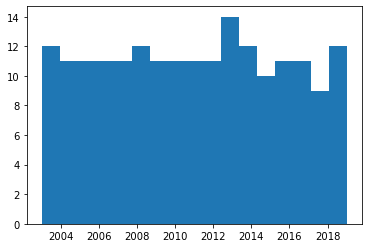

In [331]:
#number of games each year
plt.hist(df['year'],bins=17)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

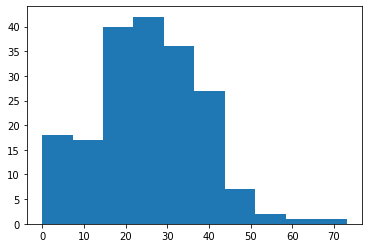

In [332]:
#TSU score distribution
plt.hist(df['TSU score'])
plt.show

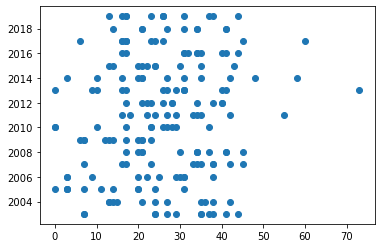

In [333]:
#scatter plot of TSU scores by year
plt.scatter(x='TSU score', y='year', data=df)
plt.show()

In [334]:
#overall mean TSU score
df['TSU score'].mean()

25.643979057591622

In [335]:
#minimum TSU score
df['TSU score'].min()

0

In [336]:
#mazimum TSU score
df['TSU score'].max()

73

<AxesSubplot:title={'center':'Mean TSU score by year'}, xlabel='year'>

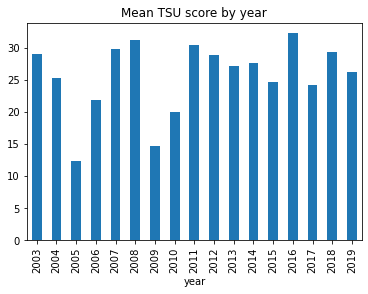

In [337]:
#Mean TSU score by year
#plot average score by year
mean_score_by_year=df.groupby(["year"])['TSU score'].mean()
mean_score_by_year.plot(kind='bar', title='Mean TSU score by year')

<AxesSubplot:title={'center':'Minimum TSU score by year'}, xlabel='year'>

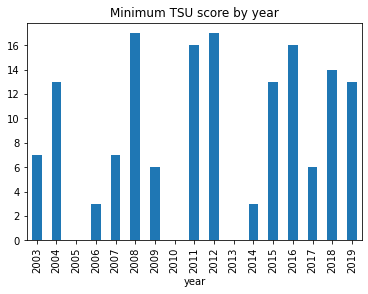

In [338]:
#Minimum TSU score by year
#plot average score by winloss and year
min_score_by_year=df.groupby(["year"])['TSU score'].min()
min_score_by_year.plot(kind='bar', title='Minimum TSU score by year')

<AxesSubplot:title={'center':'Maximum TSU score by year'}, xlabel='year'>

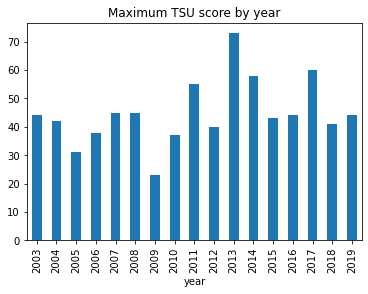

In [339]:
#Maximum TSU score by year
#plot average score by winloss and year
max_score_by_year=df.groupby(["year"])['TSU score'].max()
max_score_by_year.plot(kind='bar', title='Maximum TSU score by year')

<AxesSubplot:title={'center':'Number of TSU wins and losses per year'}, xlabel='year,winloss'>

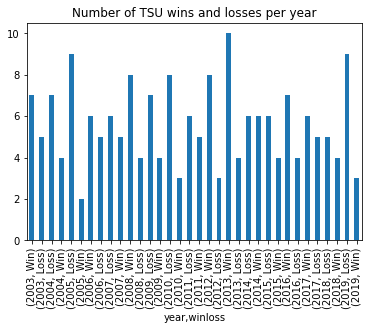

In [340]:
#number of wins and losses by year
num_win_loss_by_year=df.groupby(['year'])['winloss'].value_counts()
num_win_loss_by_year.plot(kind='bar',title='Number of TSU wins and losses per year')

In [341]:
#wins and losses 
df['winloss'].value_counts()

Loss    99
Win     92
Name: winloss, dtype: int64

In [342]:
#Mean TSU score by wins and losses 
df.pivot_table("TSU score",index='winloss')

,TSU score
winloss,
Loss,19.151515
Win,32.630435


In [343]:
#minimum TSU score by wins and losses
df.pivot_table("TSU score",index='winloss',aggfunc=np.min)

,TSU score
winloss,
Loss,0
Win,10


In [344]:
#maximum score by wins and losses
df.pivot_table("TSU score",index='winloss',aggfunc=np.max)

,TSU score
winloss,
Loss,44
Win,73


In [345]:
 #Mean TSU score by wins and losses by year
df.pivot_table("TSU score",index='winloss', columns='year')

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
winloss,,,,,,,,,,,,,,,,,
Loss,22.200000,21.428571,9.444444,11.400000,25.666667,19.75,11.857143,15.875,25.333333,27.333333,8.75,20.500000,22.833333,24.500000,16.2,23.40,25.000000
Win,33.857143,32.000000,25.500000,30.666667,34.800000,37.00,19.500000,31.000,36.600000,29.375000,34.60,34.833333,27.250000,36.714286,31.0,36.75,29.666667


In [346]:
 #Maximum TSU score by wins and losses by year
df.pivot_table("TSU score",index='winloss', columns='year',aggfunc=np.max)

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
winloss,,,,,,,,,,,,,,,,,
Loss,38,36,24,22,38,21,21,28,34,28,16,42,43,34,26,34,44
Win,44,42,31,38,45,45,23,37,55,40,73,58,35,44,60,41,37


In [347]:
 #Minimum TSU score by wins and losses by year
df.pivot_table("TSU score",index='winloss', columns='year',aggfunc=np.min)

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
winloss,,,,,,,,,,,,,,,,,
Loss,7,13,0,3,7,17,6,0,16,26,0,3,13,16,6,14,13
Win,24,21,20,25,16,30,14,27,18,17,17,10,20,31,17,31,26


<AxesSubplot:title={'center':'Mean TSU score by wins and losses'}, xlabel='winloss'>

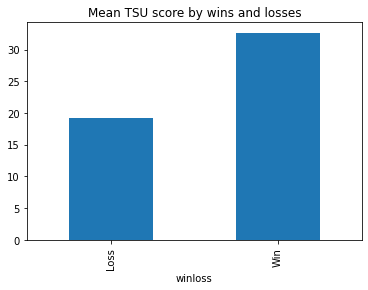

In [348]:
#plot average TSU score by winloss 
avg_score=df.groupby(["winloss"])['TSU score'].mean()
avg_score.plot(kind='bar', title='Mean TSU score by wins and losses')

<AxesSubplot:title={'center':'Mean TSU score by year and wins and losses'}, xlabel='year,winloss'>

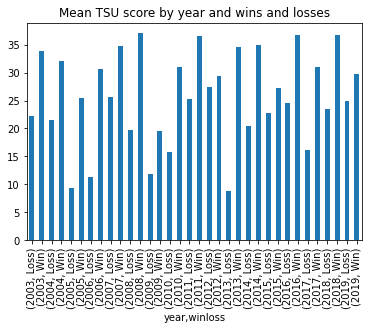

In [349]:
#plot average TSU score by winloss and year
avg_score=df.groupby(["year","winloss"])['TSU score'].mean()
avg_score.plot(kind='bar', title='Mean TSU score by year and wins and losses')

In [350]:
#number of home and away games
df['locale'].value_counts()

Away    111
Home     80
Name: locale, dtype: int64

In [351]:
#Mean TSU score by locale
df.pivot_table("TSU score",index='locale')

,TSU score
locale,
Away,24.936937
Home,26.625000


In [352]:
#Maximum and minimum TSU score by locale 
df.pivot_table("TSU score",index='locale',aggfunc=[np.max,np.min])

,amax,amin
,TSU score,TSU score
locale,,
Away,73,0
Home,60,0


In [353]:
#number of home and away games by year
df.groupby(['year'])['locale'].value_counts()

year  locale
2003  Away      7
      Home      5
2004  Away      7
      Home      4
2005  Away      7
      Home      4
2006  Home      6
      Away      5
2007  Away      7
      Home      4
2008  Away      7
      Home      5
2009  Away      7
      Home      4
2010  Away      7
      Home      4
2011  Away      7
      Home      4
2012  Away      6
      Home      5
2013  Away      9
      Home      5
2014  Away      6
      Home      6
2015  Away      6
      Home      4
2016  Away      6
      Home      5
2017  Away      7
      Home      4
2018  Home      5
      Away      4
2019  Away      6
      Home      6
Name: locale, dtype: int64

<AxesSubplot:title={'center':'Mean TSU score for locale by year'}, xlabel='year,locale'>

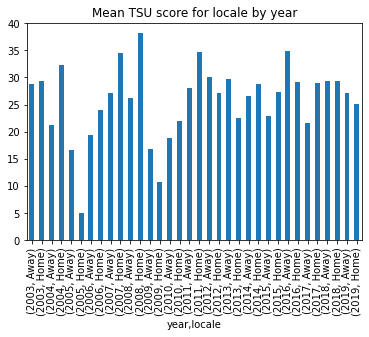

In [354]:
#plot average score by locale and year
avg_score_by_winloss=df.groupby(["year",'locale'])['TSU score'].mean()
avg_score_by_winloss.plot(kind='bar', title='Mean TSU score for locale by year')

In [355]:
#mean absolute value score difference
df['scorediff_abs'].mean()

14.502617801047121

In [356]:
#minimum absolute value score difference
df['scorediff_abs'].min()

1

In [357]:
#maximum absolute value score difference
df['scorediff_abs'].max()

67

<AxesSubplot:title={'center':'Mean absolute value score difference by year'}, xlabel='year'>

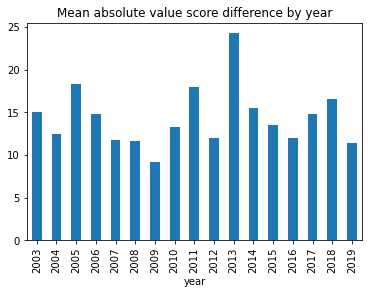

In [358]:
#mean absoluute value score difference by year
avg_diff_by_year=df.groupby(["year",])['scorediff_abs'].mean()
avg_diff_by_year.plot(kind='bar', title='Mean absolute value score difference by year')

<AxesSubplot:title={'center':'Maximum absolute value score difference by year'}, xlabel='year'>

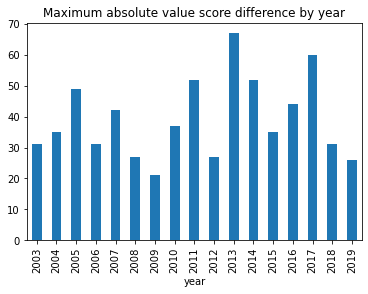

In [359]:
#maximum absolute value score difference by year
max_diff_by_year=df.groupby(["year",])['scorediff_abs'].max()
max_diff_by_year.plot(kind='bar', title='Maximum absolute value score difference by year')

<AxesSubplot:title={'center':'Minimum absolute value score difference by year'}, xlabel='year'>

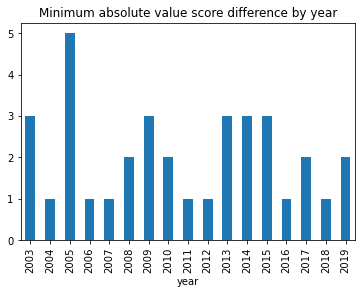

In [360]:
#minimum absolute value score difference by year
min_diff_by_year=df.groupby(["year",])['scorediff_abs'].min()
min_diff_by_year.plot(kind='bar', title='Minimum absolute value score difference by year')

In [361]:
#mean absolute value difference by locale
df.groupby(['locale'])['scorediff_abs'].mean()

locale
Away    13.648649
Home    15.687500
Name: scorediff_abs, dtype: float64

In [362]:
#maximum absolute value difference by locale
df.groupby(['locale'])['scorediff_abs'].max()

locale
Away    67
Home    60
Name: scorediff_abs, dtype: int64

In [363]:
#minimum  absolute value difference by locale
df.groupby(['locale'])['scorediff_abs'].min()

locale
Away    1
Home    1
Name: scorediff_abs, dtype: int64

In [364]:
#save data frame to folder
df.to_csv('scores.csv',encoding='utf-8')